# Recognition of clothing items (fashionMNIST) with neural networks

## Setup

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as ts
import tensorflow.keras as keras
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import models, layers
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
#data = tfds.load('mnist', split='train', as_supervised=True, shuffle_files=True)
(xtrain, ytrain), (xtest, ytest) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# shape of a single data point
xtrain[0].shape

(28, 28)

In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
ytrain.shape

(60000,)

In [ ]:
xtest.shape

(10000, 28, 28)

### Image preprocessing

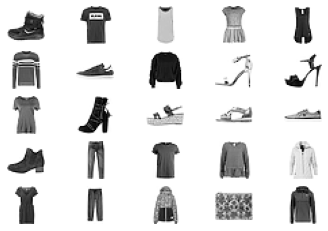

In [ ]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')

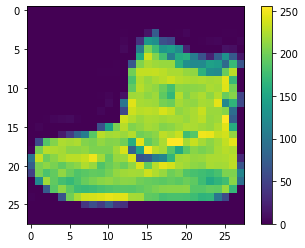

In [ ]:
# Inspect the pixel values -> they fall in the range of 0 to 255

plt.figure()
plt.imshow(xtrain[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Scale the pixel values to a range of 0 to 1 
xtrain = xtrain.astype('float32') / 255
xtest = xtest.astype('float32') / 255

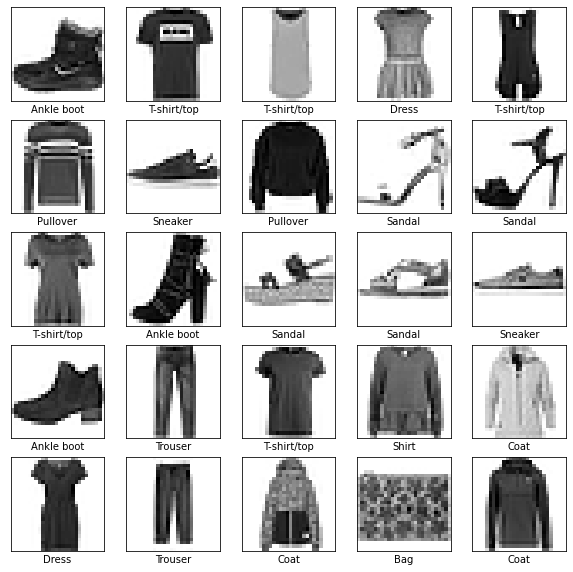

In [ ]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xtrain[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[ytrain[i]])
plt.show()

In [ ]:
# one-hot-enocde the labels
#ytrain = to_categorical(ytrain, num_classes=10)
#ytest = to_categorical(ytest, num_classes=10)

## Artificial Neural Networks

In [ ]:
model = models.Sequential()

# model.add(layers.Flatten(input_shape=(28,28)))
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dropout(0.25))
# model.add(layers.Dense(100, activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(10, activation='softmax'))

# Test accuracy: 0.880

In [ ]:
#model.add(layers.Flatten(input_shape=(28,28)))
#model.add(layers.Dense(300, activation='relu'))
#model.add(layers.Dense(128, activation='relu'))
#model.add(layers.Dense(10, activation='softmax')) 

# Test accuracy: 0.886

In [ ]:
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(2048, activation='relu'))
model.add(layers.Dense(1024))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(1024))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(10))
model.add(layers.BatchNormalization())
model.add(layers.Activation('softmax'))) 


# Epochs: 100
# Batch size: 256
# Train accuracy: 0.905
# Train loss: 0.263
# Test accuracy: 0.88
# Test loss: 0.333 

In [ ]:
"""
Model with SGD optimizer
with Nesterov momentum to speed up the convergence. 
The performance became worse after 66/100 epochs --> the model reached the basin
of a minimim but kept on jumping on the sides without reaching it.
--> set a smaller learning rate and a proportionally longer training process.
"""

sgd = keras.optimizers.SGD(
    lr=0.001,
    momentum=0.8,
    nesterov=True
    )

rmsp = keras.optimizers.RMSprop(
    lr=0.001,
    rho=0.8
    )

adam = keras.optimizers.Adam()

In [ ]:

#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.compile(
    optimizer='adam',
    #loss='categorical_crossentropy',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
    )

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               12900     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 114,390
Trainable params: 114,390
Non-trainable params: 0
________________________________________________

In [ ]:
#history = model.fit(xtrain, ytrain, epochs=500, batch_size=500, validation_split = 0.20)

history = model.fit(
    xtrain,
    ytrain,
    epochs=50,
    batch_size=500,
    validation_data=(xtest, ytest))

Epoch 1/50
120/120 [==============================] - 1s 11ms/step - loss: 1.8675 - accuracy: 0.6141 - val_loss: 1.6936 - val_accuracy: 0.7724
Epoch 2/50
120/120 [==============================] - 1s 10ms/step - loss: 1.6933 - accuracy: 0.7768 - val_loss: 1.6695 - val_accuracy: 0.7939
Epoch 3/50
120/120 [==============================] - 1s 10ms/step - loss: 1.6718 - accuracy: 0.7930 - val_loss: 1.6604 - val_accuracy: 0.8015
Epoch 4/50
120/120 [==============================] - 1s 10ms/step - loss: 1.6570 - accuracy: 0.8087 - val_loss: 1.6359 - val_accuracy: 0.8278
Epoch 5/50
120/120 [==============================] - 1s 10ms/step - loss: 1.6333 - accuracy: 0.8314 - val_loss: 1.6246 - val_accuracy: 0.8379
Epoch 6/50
120/120 [==============================] - 1s 10ms/step - loss: 1.6236 - accuracy: 0.8411 - val_loss: 1.6159 - val_accuracy: 0.8466
Epoch 7/50
120/120 [==============================] - 1s 10ms/step - loss: 1.6179 - accuracy: 0.8466 - val_loss: 1.6200 - val_accuracy: 0.8403

## Model evaluation

In [ ]:
train_loss, train_acc = model.evaluate(xtrain, ytrain)
test_loss, test_acc = model.evaluate(xtest, ytest)

print("Train accuracy:", round(train_acc, 5))
print("Train loss:", round(train_loss, ))

print("Test accuracy:", round(test_acc, 5))
print("Test loss:", round(test_loss, 3))

313/313 [==============================] - 0s 2ms/step - loss: 1.5806 - accuracy: 0.8807
Train accuracy: 0.90727
Train loss: 2
Test accuracy: 0.8807
Test loss: 1.581


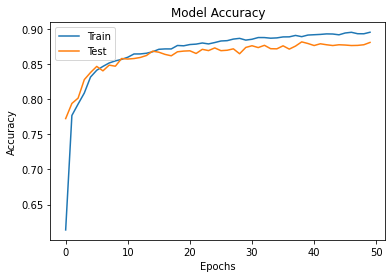

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

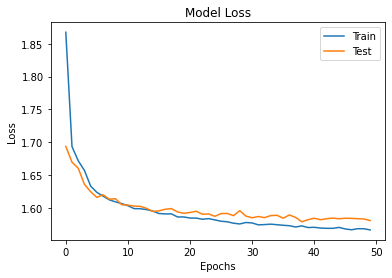

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

In [ ]:
plot_model(model, to_file='fmnist1.png',show_shapes=True, show_layer_names=True)
model.save("fmnist1.h5")
#load_model("fmnist.h5")

## Confusion matrix

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, 
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])

# Predictions

In [ ]:
probability_model = keras.Sequential([model, layers.Softmax()])
predictions = probability_model.predict(xtest)
predictions[0]

array([0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674,
       0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.23196931],
      dtype=float32)

In [ ]:
# Check the label with the highest confidence value
np.argmax(predictions[0])

9

In [ ]:
# Verify the prediction of the label above
ytest[0]
#plt.imshow(ytest[0])

9

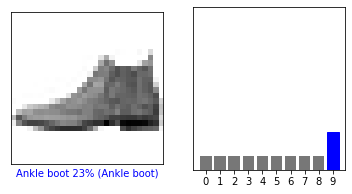

In [ ]:
def plot_image(i, predictions_array, ytrain, img):
  ytrain, img = ytrain[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  ytest = np.argmax(predictions_array)
  if ytest == ytrain:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[ytest],
                                100*np.max(predictions_array),
                                class_names[ytrain]),
                                color=color)

def plot_value_array(i, predictions_array, ytrain):
  ytrain = ytrain[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  ytest = np.argmax(predictions_array)

  thisplot[ytest].set_color('red')
  thisplot[ytrain].set_color('blue')


i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], ytest, xtest)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  ytest)
plt.show()

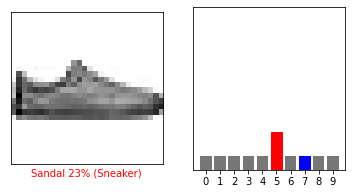

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], ytest, xtest)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  ytest)
plt.show()

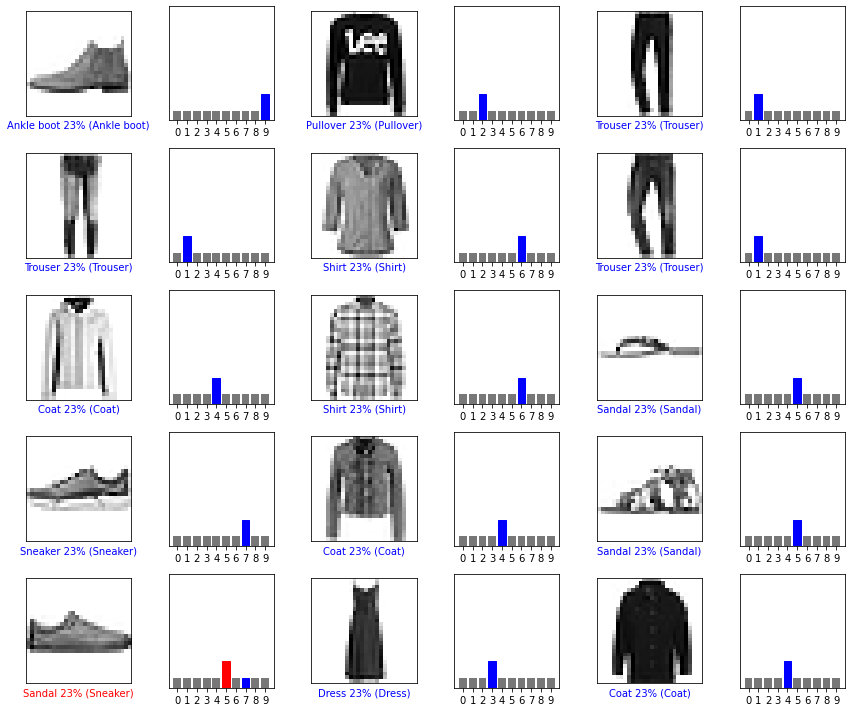

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], ytest, xtest)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], ytest)
plt.tight_layout()
plt.show()

In [ ]:
# Grab an image from the test dataset.
img = xtest[1]
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [ ]:
# predict the correct label for this image
predictions_single = probability_model.predict(img)
print(predictions_single)

[[0.08533674 0.08533674 0.23196931 0.08533674 0.08533674 0.08533674
  0.08533674 0.08533674 0.08533674 0.08533674]]


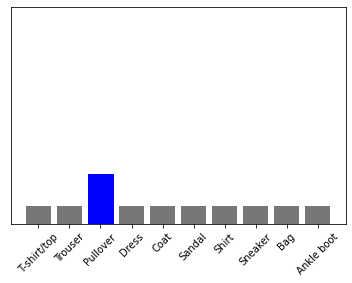

In [ ]:
plot_value_array(1, predictions_single[0], ytest)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
#predictions for the only image in the batch:
np.argmax(predictions_single[0])

2

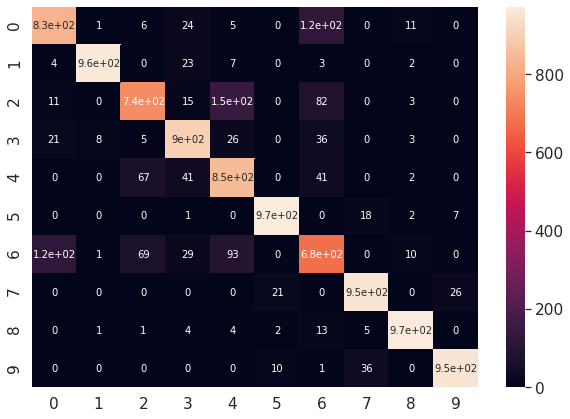

In [ ]:
Y_pred_classes = np.argmax(predictions,axis = 1) 
cm = confusion_matrix(ytest, Y_pred_classes) 

df_cm = pd.DataFrame(cm, range(10), range(10))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 10}) # font size

plt.show()